In [2]:
import os
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
data_folder = "..\\data\\raw"
os.listdir(data_folder)

['Testing.csv', 'Training.csv']

In [40]:
#load the data

training_data = pd.read_csv(os.path.join(data_folder, "Training.csv"), index_col=False)
testing_data = pd.read_csv(os.path.join(data_folder, "Testing.csv"), index_col=False)

training_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [31]:
# Select only the feature columns for clustering
feature_columns = training_data.columns[:-1]  # Assuming the last column is the target variable

# Extract the feature data
X = training_data[feature_columns].values
# Compute the distance matrix. For binary data with sparse features, Jaccard distance is a good choice.
distance_matrix = pdist(X, metric='jaccard')

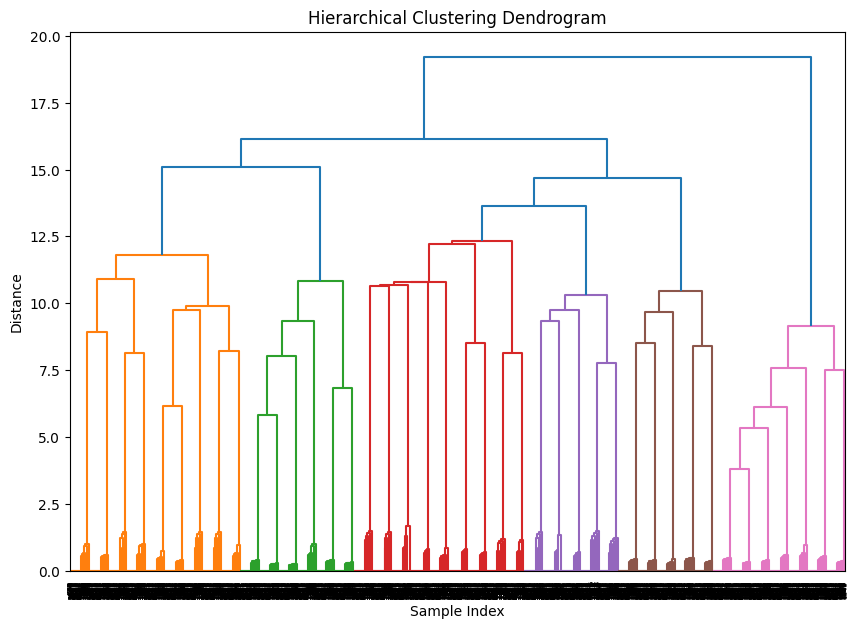

In [32]:
#Dendrogram to help us decide the number of clusters
linked = linkage(distance_matrix, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

There appear to be ~41 'natural' clusters in the data set that even split into a roughly equal number of observations, matching the number of diseases.

In [41]:
#perform the clustering
n_clusters = 41  # based on the dendrogram
clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='precomputed', linkage ='average')

# Fit the model using the distance matrix after converting it to a square form for sklearn
clustering.fit(squareform(distance_matrix))

# Add cluster labels to the original data
training_data['Cluster'] = clustering.labels_
training_data.head()

C:\Users\deeqa\AppData\Local\Temp\ipykernel_25196\3502002994.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  training_data['Cluster'] = clustering.labels_


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Cluster
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,2
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,2
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,2
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,2
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,2


In [42]:
training_data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis', 'Cluster'],
      dtype='str', length=134)

In [43]:
training_data['Cluster'].value_counts()

Cluster
2     120
0     120
13    120
38    120
30    120
9     120
3     120
20    120
14    120
10    120
8     120
26    120
29    120
6     120
31    120
28    120
22    120
34    120
36    120
39    120
32    120
17    120
35    120
40    120
21    120
37    120
33    120
27    120
15    120
4     120
19    120
16    120
24    120
25    120
23    120
18    120
12    120
1     120
5     120
11    120
7     120
Name: count, dtype: int64

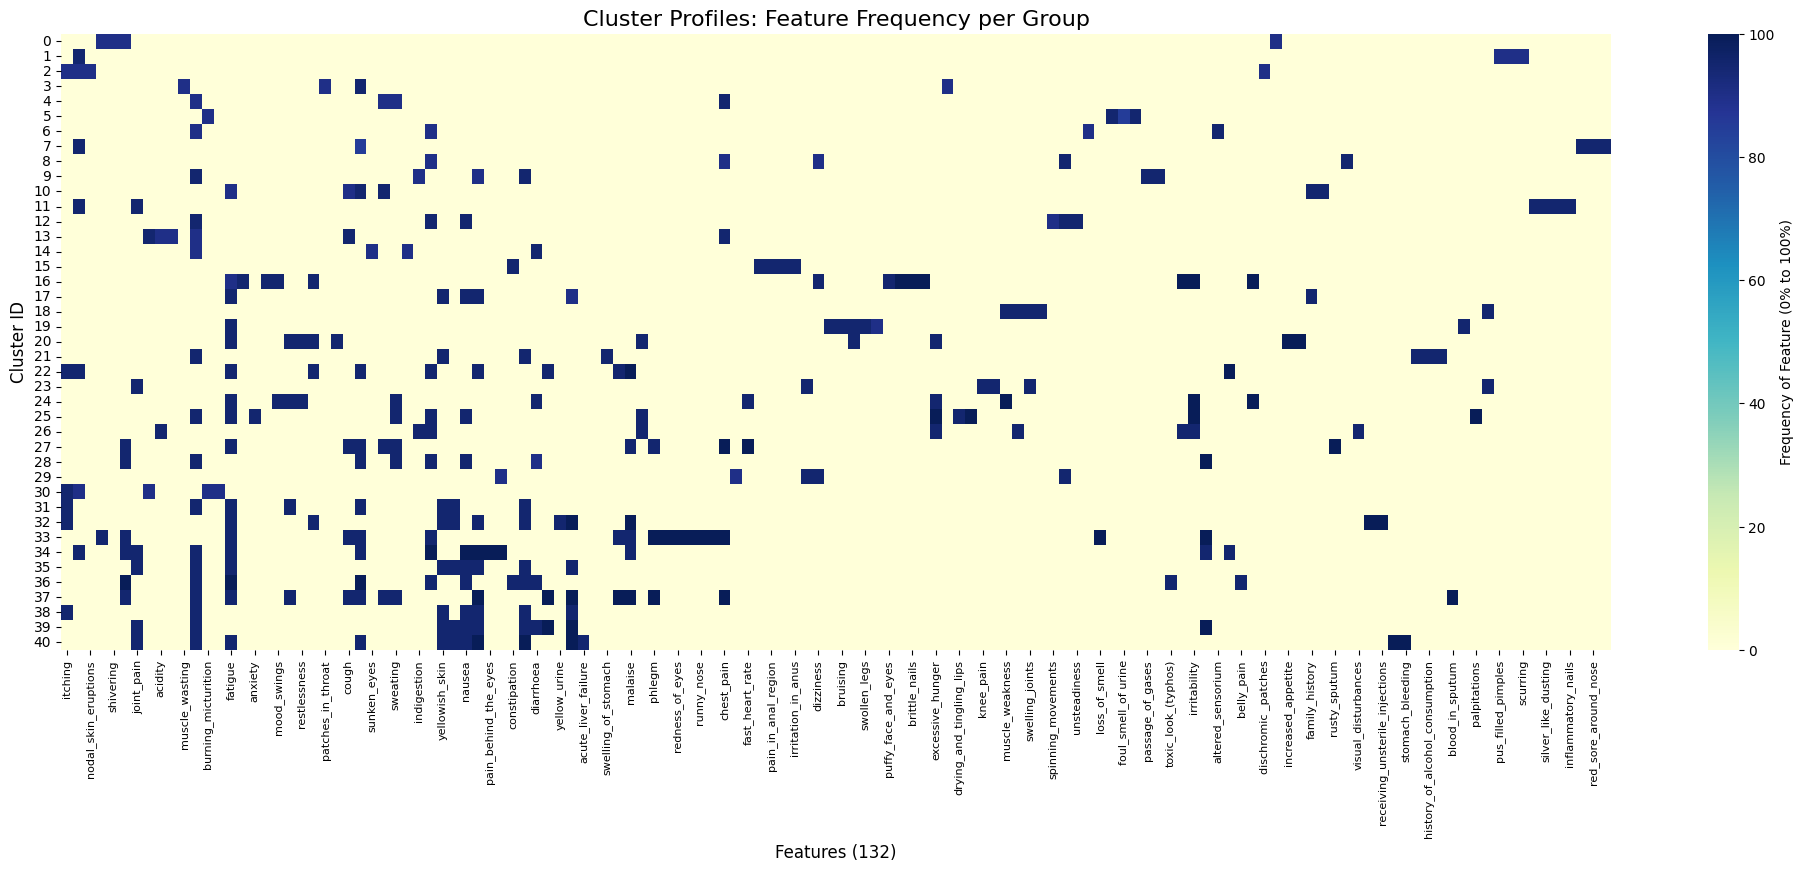

In [ ]:
cluster_profiles = training_data.groupby('Cluster')[feature_columns].mean() * 100  # Convert to percentage

# 2. Plot the Heatmap
plt.figure(figsize=(25, 8))
sns.heatmap(
    cluster_profiles, 
    cmap="YlGnBu",   # Blue/Green gradient shows density of '1's
    annot=False,     # Numbers would be too crowded for 133 features
    cbar_kws={'label': 'Frequency of Feature (0% to 100%)'}
)

plt.title('Cluster Profiles: Feature Frequency per Group', fontsize=16)
plt.xlabel('Features (133)', fontsize=12)
plt.ylabel('Cluster ID', fontsize=12)
plt.xticks(rotation=90, fontsize=8) # Ensure column names are readable
plt.show()

In [ ]:
# map clusters to target variable
cluster_target_mapping = training_data.groupby('Cluster')['prognosis'].agg(lambda x: x.value_counts().index[0])
#print(cluster_target_mapping)

# Now we can use this mapping to predict the target variable for each cluster in the training data
training_data['Predicted_Prognosis'] = training_data['Cluster'].map(cluster_target_mapping)

# Evaluate the accuracy of our predictions
accuracy = (training_data['Predicted_Prognosis'] == training_data['prognosis']).mean()
print(f'Clustering-based Prediction Accuracy: {accuracy:.2%}')

Clustering-based Prediction Accuracy: 100.00%


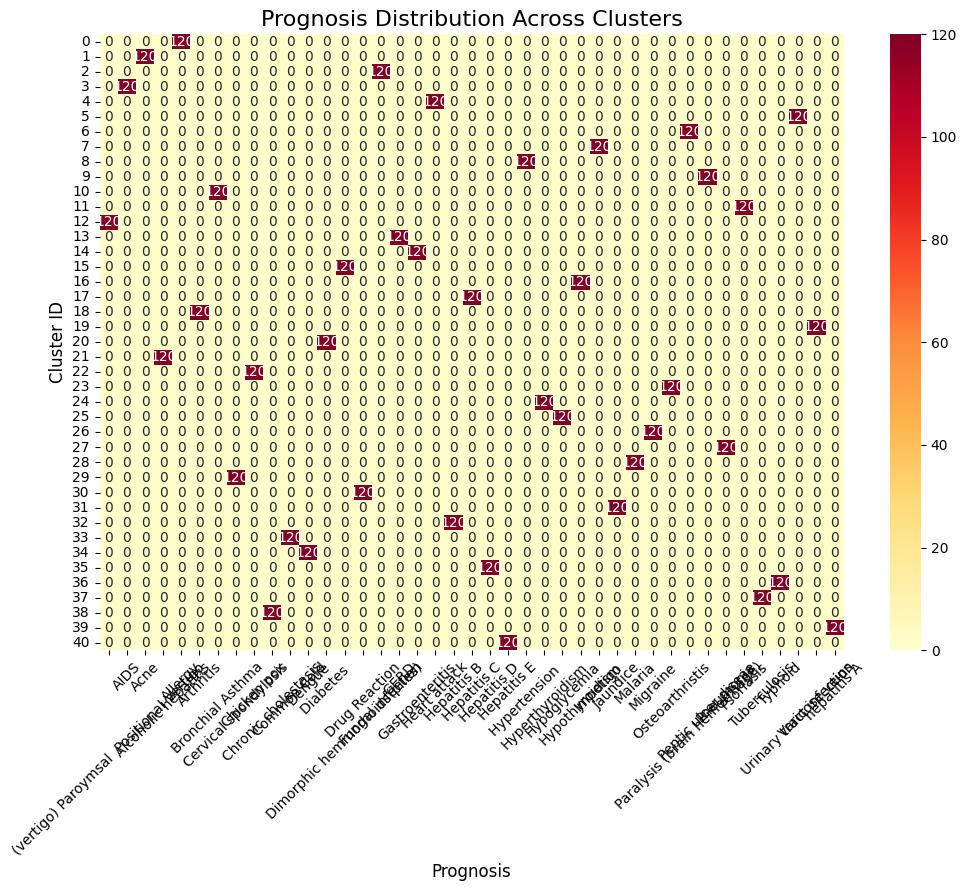

In [50]:
#heatmap of the prognosis distribution across clusters
prognosis_distribution = training_data.groupby(['Cluster', 'prognosis']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(prognosis_distribution, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Prognosis Distribution Across Clusters', fontsize=16)
plt.xlabel('Prognosis', fontsize=12)
plt.ylabel('Cluster ID', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()


<Axes: ylabel='Cluster'>

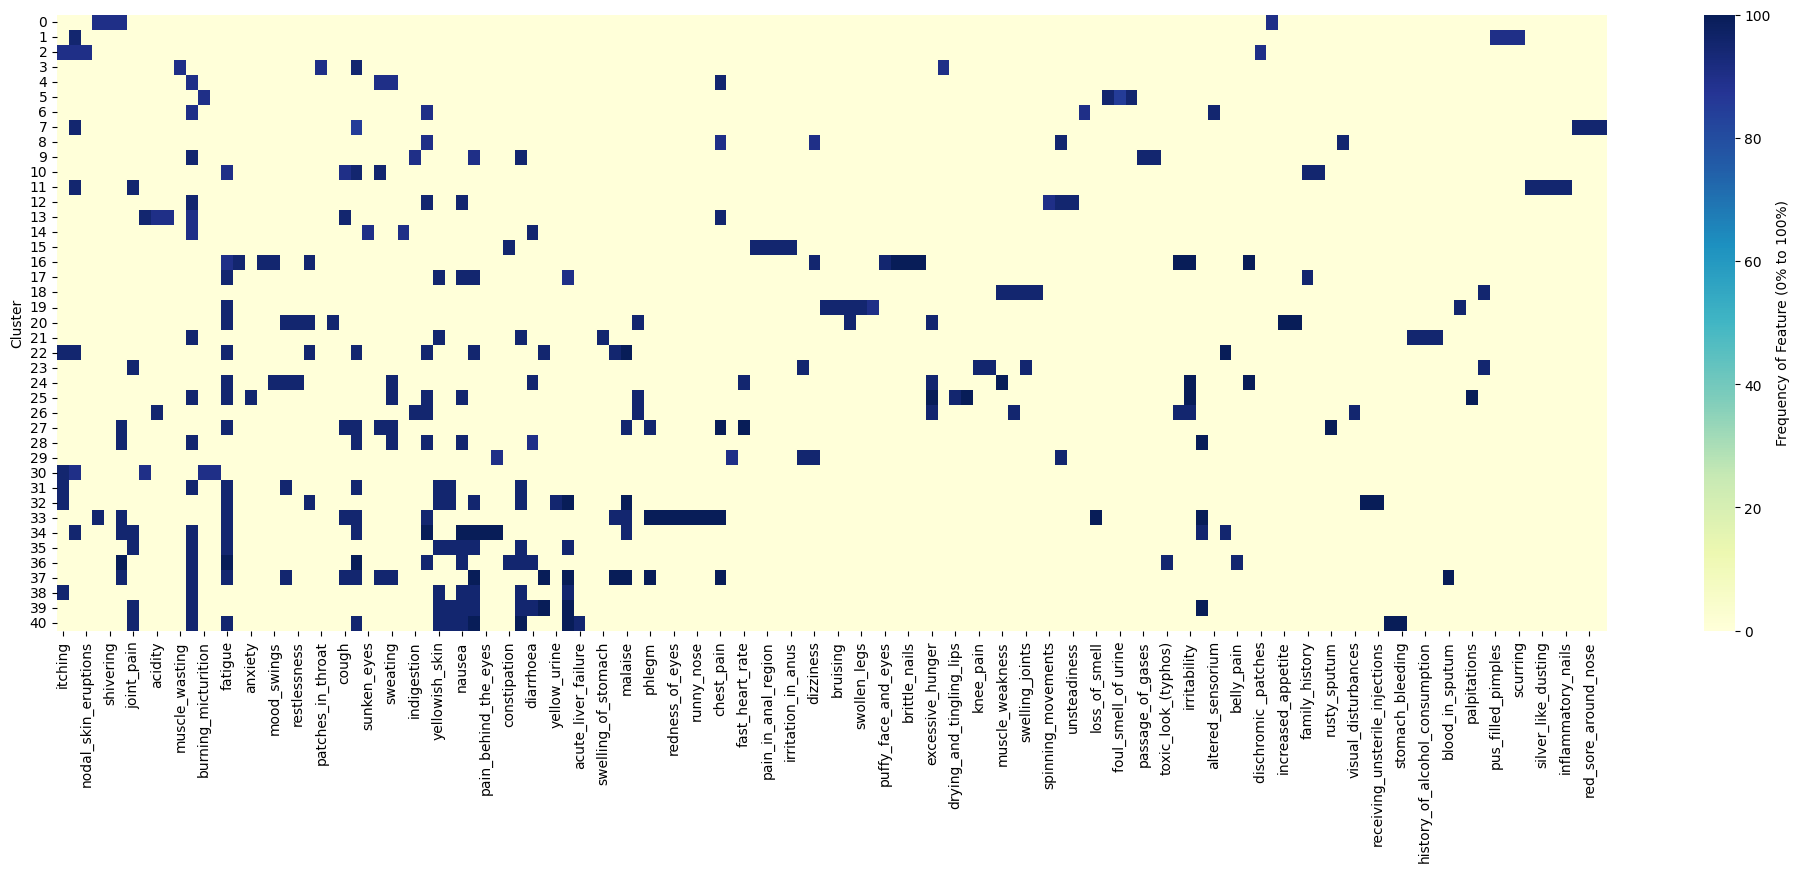

In [52]:
#heatmap of the feature distribution across predictive prognosis clusters
feature_distribution = training_data.groupby(['Cluster'])[feature_columns].mean() * 100  # Convert to percentage
plt.figure(figsize=(25, 8))
sns.heatmap(
    feature_distribution, 
    cmap="YlGnBu",   # Blue/Green gradient shows density of '1's
    annot=False,     # Numbers would be too crowded for 133 features
    cbar_kws={'label': 'Frequency of Feature (0% to 100%)'}
)